This is a redo of https://github.com/Vict0rSch/deep_learning/tree/master/keras/recurrent.

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip household_power_consumption.zip

--2016-07-12 16:19:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20640916 (20M) [application/zip]
Saving to: 'household_power_consumption.zip'

household_power_con 100%[=====================>]  19.68M   396KB/s   in 61s    

2016-07-12 16:20:13 (331 KB/s) - 'household_power_consumption.zip' saved [20640916/20640916]

Archive:  household_power_consumption.zip
  inflating: household_power_consumption.txt  


In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

np.random.seed(1234)

/Users/baonguyen/tf/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using TensorFlow backend.


In [13]:
def data_power_consumption(path_to_file='household_power_consumption.txt', sequence_length=50, ratio=1.0):
    max_values = ratio * 2049280

    with open(path_to_file) as f:
        data = csv.reader(f, delimiter=";")
        power = []
        nb_of_values = 0
        for line in data:
            try:
                power.append(float(line[2]))
                nb_of_values += 1
            except ValueError:
                pass
            # 2049280.0 is the total number of valid values, i.e. ratio = 1.0
            if nb_of_values / 2049280.0 >= ratio:
                break
                
    result = []
    for index in range(len(power) - sequence_length):
        result.append(power[index: index + sequence_length])
    result = np.array(result)  # shape (2049230, 50)
    result_mean = result.mean()
    result -= result_mean
    print "Shift : ", result_mean
    print "Data  : ", result.shape

    row = round(0.9 * result.shape[0])
    train = result[:row, :]
    np.random.shuffle(train)
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = result[row:, :-1]
    y_test = result[row:, -1]
    
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return [X_train, y_train, X_test, y_test]

In [20]:
def build_model(sequence_length):

    model = Sequential()
    layers = [1, 50, 100, 1]
    
    model.add(LSTM(
            input_dim=layers[0],
            input_length=sequence_length - 1,
            output_dim=layers[1],
            return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(
            layers[2],
            return_sequences=False))
    model.add(Dropout(0.2))
    
    model.add(Dense(
            output_dim=layers[3]))
    model.add(Activation("linear"))
    
    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print "Compilation Time : ", time.time() - start
    return model

In [25]:
def run_network(model, data, epochs = 1):
    X_train, y_train, X_test, y_test = data
    global_start_time = time.time()
        
    try:
        model.fit(
            X_train, y_train,
            batch_size=512, nb_epoch=epochs, validation_split=0.05)
        predicted = model.predict(X_test)
        predicted = np.reshape(predicted, (predicted.size,))
    except KeyboardInterrupt:
        print 'Training duration (s) : ', time.time() - global_start_time
        return model, y_test, 0
    
    try:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(y_test[:100])
        plt.plot(predicted[:100])
        plt.show()
    except Exception as e:
        print str(e)

    print 'Training duration (s) : ', time.time() - global_start_time
    return model, y_test, predicted

Shift :  1.86638379299
Data  :  (20443, 50)


/Users/baonguyen/tf/lib/python2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/baonguyen/tf/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/baonguyen/tf/lib/python2.7/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Compilation Time :  8.62993407249
Train on 17479 samples, validate on 920 samples
Epoch 1/1
17479/17479 [==============================] - 28s - loss: 0.5689 - val_loss: 0.3877


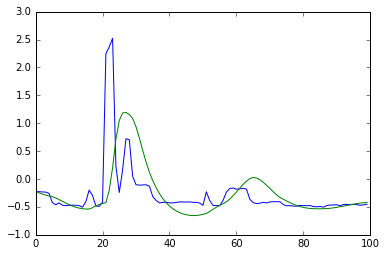

Training duration (s) :  141.325792789


(<keras.models.Sequential at 0x155789f10>,
 array([-0.23038379, -0.22638379, -0.23238379, ..., -1.48038379,
        -1.48038379, -1.48438379]),
 array([-0.22315998, -0.24726789, -0.26939461, ..., -1.11916232,
        -1.16721022, -1.21335244]))

In [27]:
data = data_power_consumption(ratio = 0.01)
model = build_model(50)

run_network(model, data)

Shift :  2.27485322
Data  :  (2000, 50)


/Users/baonguyen/tf/lib/python2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/baonguyen/tf/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/baonguyen/tf/lib/python2.7/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Compilation Time :  11.3595230579
Train on 1710 samples, validate on 90 samples
Epoch 1/1
1710/1710 [==============================] - 7s - loss: 1.0666 - val_loss: 0.6601


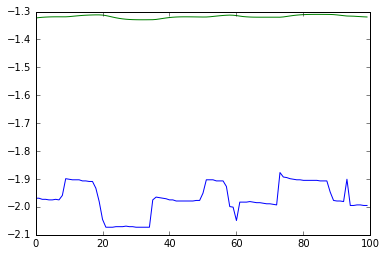

Training duration (s) :  141.069685936


(<keras.models.Sequential at 0x1584979d0>,
 array([-1.96885322, -1.96885322, -1.97285322, -1.97285322, -1.97485322,
        -1.97485322, -1.97285322, -1.97485322, -1.95885322, -1.89885322,
        -1.90085322, -1.90285322, -1.90285322, -1.90285322, -1.90685322,
        -1.90685322, -1.90885322, -1.90885322, -1.93285322, -1.98085322,
        -2.04485322, -2.07285322, -2.07285322, -2.07285322, -2.07085322,
        -2.07085322, -2.07085322, -2.06885322, -2.07085322, -2.07085322,
        -2.07285322, -2.07285322, -2.07285322, -2.07285322, -2.07285322,
        -1.97485322, -1.96485322, -1.96685322, -1.96885322, -1.97085322,
        -1.97485322, -1.97485322, -1.97885322, -1.97885322, -1.97885322,
        -1.97885322, -1.97885322, -1.97885322, -1.97685322, -1.97685322,
        -1.95085322, -1.90285322, -1.90285322, -1.90285322, -1.90685322,
        -1.90685322, -1.90685322, -1.92685322, -1.99885322, -2.00085322,
        -2.04885322, -1.98285322, -1.98285322, -1.98285322, -1.98085322,
        

In [28]:
# run again with smaller data
data = data_power_consumption(ratio = 0.001)
model = build_model(50)

run_network(model, data)